# Tidy Data Project: Mutant Moneyball

This Jupyter notebook serves as the basis of my Tidy Data project, in which I use the data file regarding the data used in Rally's *Mutant Moneyball* article.

## Section 1: Data Cleaning and Tidy Process

Before jumping into the data analysis, we must import the data analysis tools we need as well as the dataset itself.

In [61]:
# Import necessary functions.
import pandas as pd

# Import mutant_moneyball dataset.
df = pd.read_csv("data/mutant_moneyball.csv")

# Display basic info.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Member                  26 non-null     object 
 1   TotalValue60s_heritage  10 non-null     float64
 2   TotalValue70s_heritage  16 non-null     float64
 3   TotalValue80s_heritage  23 non-null     float64
 4   TotalValue90s_heritage  22 non-null     float64
 5   TotalValue60s_ebay      10 non-null     float64
 6   TotalValue70s_ebay      16 non-null     float64
 7   TotalValue80s_ebay      23 non-null     float64
 8   TotalValue90s_ebay      22 non-null     float64
 9   TotalValue60s_wiz       10 non-null     object 
 10  TotalValue70s_wiz       16 non-null     object 
 11  TotalValue80s_wiz       23 non-null     object 
 12  TotalValue90s_wiz       22 non-null     object 
 13  TotalValue60s_oStreet   10 non-null     object 
 14  TotalValue70s_oStreet   16 non-null     obje

Next, we must melt the dataframe in order to convert the dataset from wide format to long format. This is key to tidy data.

In [62]:
df_melted = pd.melt(df, id_vars = ["Member"], # Holds the column 'Member' constant.
                    value_vars = ["TotalValue60s_heritage", "TotalValue70s_heritage", "TotalValue80s_heritage", "TotalValue90s_heritage",
                                  "TotalValue60s_ebay", "TotalValue70s_ebay", "TotalValue80s_ebay", "TotalValue90s_ebay",
                                  "TotalValue60s_wiz", "TotalValue70s_wiz", "TotalValue80s_wiz", "TotalValue90s_wiz",
                                  "TotalValue60s_oStreet", "TotalValue70s_oStreet", "TotalValue80s_oStreet", "TotalValue90s_oStreet"], # Columns being reoriented.
                    var_name = "ValueType", # Names column that will hold all columns being reoriented.
                    value_name = "Price") # Names the column containing values from untidy dataset.

# Display the first 5 rows.
df_melted.head()

,Member,ValueType,Price
0,warrenWorthington,TotalValue60s_heritage,929056.0
1,hankMcCoy,TotalValue60s_heritage,929776.0
2,scottSummers,TotalValue60s_heritage,933616.0
3,bobbyDrake,TotalValue60s_heritage,929776.0
4,jeanGrey,TotalValue60s_heritage,933616.0


Then, we must split our ValueType column into two using the str.split. This is because there are multiple variables in this new column.

In [63]:
# Split 'ValueType' into 'Source' and 'Decade' because it contains combined information about both.

df_melted[["Decade", "Source"]] = df_melted["ValueType"].str.split('_', expand = True)

# Display the first 5 rows.
df_melted.head()

,Member,ValueType,Price,Decade,Source
0,warrenWorthington,TotalValue60s_heritage,929056.0,TotalValue60s,heritage
1,hankMcCoy,TotalValue60s_heritage,929776.0,TotalValue60s,heritage
2,scottSummers,TotalValue60s_heritage,933616.0,TotalValue60s,heritage
3,bobbyDrake,TotalValue60s_heritage,929776.0,TotalValue60s,heritage
4,jeanGrey,TotalValue60s_heritage,933616.0,TotalValue60s,heritage


Our next step is to begin tidying up individual columns. First, we shorten the column title, leaving only the necessary information.

In [64]:
# Clean the 'Decade' column by removing the words "TotalValue".

df_melted["Decade"] = df_melted["Decade"].str.replace("TotalValue", '')

# Display the first 5 rows.
df_melted.head()

,Member,ValueType,Price,Decade,Source
0,warrenWorthington,TotalValue60s_heritage,929056.0,60s,heritage
1,hankMcCoy,TotalValue60s_heritage,929776.0,60s,heritage
2,scottSummers,TotalValue60s_heritage,933616.0,60s,heritage
3,bobbyDrake,TotalValue60s_heritage,929776.0,60s,heritage
4,jeanGrey,TotalValue60s_heritage,933616.0,60s,heritage


After splitting and tidying the column, we can now get rid of our original column, as we have separated the information necessary for our analysis.

In [65]:
# Drop the 'ValueType' column now that we have separated the information.

df_melted.drop(columns=["ValueType"], inplace = True)

# Display the first 5 rows.
df_melted.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


Then, we make sure that all of our data is numerical. The easiest way to do this is to first convert it all to strings, remove all unnecessary symbols, then convert it all to float.

In [66]:
# Clean the 'Price' column by converting it to strings then float and removing all unnecessary symbols.

df_melted['Price'] = df_melted['Price'].astype(str).str.replace('[$,]', '', regex=True)
df_melted['Price'] = pd.to_numeric(df_melted['Price'], errors='coerce')

# Display the first 5 rows.
df_melted.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


Before we are done, we should check to make sure that there are no missing or duplicated values in our dataset.

In [67]:
# Check for missing or duplicated values.

print(df_melted.isnull().sum())
print()
print(df_melted.duplicated().sum)

Member      0
Price     132
Decade      0
Source      0
dtype: int64

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
411    False
412    False
413    False
414    False
415    False
Length: 416, dtype: bool>


While technically we could drop the rows with missing values, this could cause more errors later on, so we will leve it. Finally, we display the first 5 rows of our final tidy dataframe.

In [68]:
# Display first 5 rows of final tidy dataframe.

df_melted.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


## Section 2: Visualization

Now, we can begin the data visualization portion of our tidy data project. This involves using tools like seaborn to display data in a more efficient manner.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

After importing our necessary tools, we can now get started.

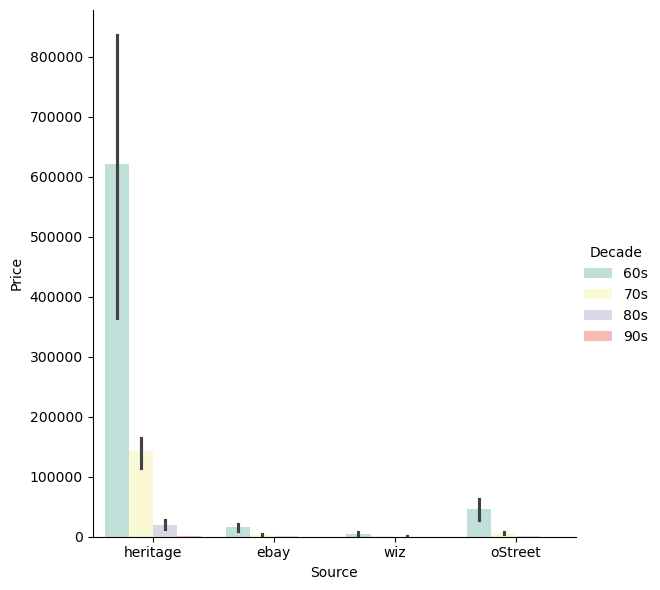

In [70]:
# Visualize the price by source, using the hue feature to highlight the decade.

sns.catplot(
    data=df_melted, kind="bar",
    x="Source", y='Price', hue="Decade",
    palette="Set3", alpha=.6, height=6
)

As you can see from the visualization above, heritage in the 60s was one of most valuable at the time, as the price for this criteria is much higher than other decades and sources. Additionally, oStreet in the 60s was higher than any other decades.

For our next visualization, we will observe average price by decade.

/var/folders/m7/t4m0x5tj6238p47fq8mb2dqm0000gn/T/ipykernel_2333/386056550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Decade', ylabel='Price'>

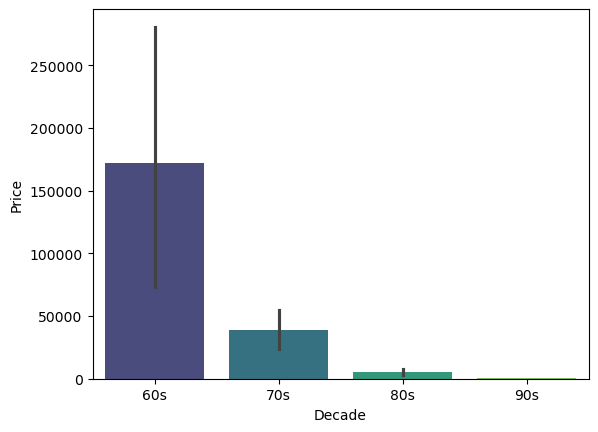

In [71]:
# Visualize the average price by decade.

sns.barplot(
    data= df_melted,  
    x='Decade',                
    y='Price',                 
    palette='viridis'
)

As we can see from the visualization, the 60s generally saw much higher prices than other decades.

## Section 3: Pivot-Table

This final step in our tidy data project is to create a pivot table, which will calculate the standard deviation over the variables given. 

In [77]:
# Create a pivot table, calculating the standard deviation of 'Price' by 'Source' and "Decade".
pivot_table = pd.pivot_table(
    df_melted, # Dataset (tidied)
    values="Price", # Aggregated values
    index='Source', # Rows of pivot table 
    columns="Decade", # Columns of pivot table
    aggfunc="std",  # Aggregation function (standard deviation)
    fill_value=0 # Missing values (filled with 0)
)

# Display the pivot table.
print("Pivot Table (Standard Deviation of Price by Source and Decade):")
print(pivot_table)

Pivot Table (Standard Deviation of Price by Source and Decade):
Decade              60s           70s           80s         90s
Source                                                         
ebay       10425.617616   1403.317094    534.065735   81.354882
heritage  408395.112113  53348.542806  19213.492572  591.515904
oStreet    30938.307615   2849.245935    789.393370   69.757155
wiz         3540.908603    492.515025    295.810750   46.165733


Based on the pivot table above, the standard deviation for all sources (ebay, heritage, oStreet, and wiz) decreases as time goes on, suggesting that prices became more consistent over time. Additionally, heritage sees much larger variability in prices than any of the other sources.